In [2]:
from sklearn import svm 
svc = svm.SVC(gamma=0.001, C=100.)

In [4]:
from sklearn import datasets
digits = datasets.load_digits()

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
digits.images[0].shape

(8, 8)

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
digits.target.size

1797

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

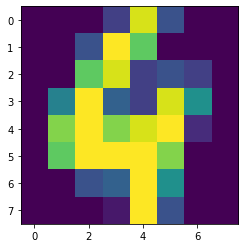

In [13]:
plt.imshow(digits.images[1791])

In [16]:
svc.fit(digits.data[1:1790], digits.target[1:1790])

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
svc.predict(digits.data[1791:1797])

array([4, 9, 0, 8, 9, 8])

In [23]:
digits.target[1791:1797]

array([4, 9, 0, 8, 9, 8])

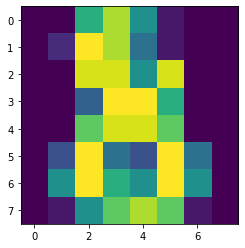

In [22]:
plt.imshow(digits.images[1796])

In [46]:
import pandas as pd

In [25]:
import tensorflow as tf

In [26]:
data = datasets.load_digits()

In [27]:
from sklearn.model_selection import train_test_split

In [66]:
X = data.images

In [67]:
Y = data.target

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [69]:
len(x_train)

1437

In [70]:
len(x_test)

360

In [71]:
x_train[0].shape

(8, 8)

In [72]:
x_train[0]

array([[ 0.,  0., 13., 16., 16., 15.,  2.,  0.],
       [ 0.,  0., 14., 13., 11., 16.,  2.,  0.],
       [ 0.,  0., 11., 13., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  5., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0., 10., 14., 15.,  0.,  0.,  0.],
       [ 0.,  1., 14.,  3., 15.,  7.,  0.,  0.],
       [ 0.,  6., 11.,  0., 15.,  6.,  0.,  0.],
       [ 0.,  1., 13., 16., 15.,  3.,  0.,  0.]])

In [73]:
x_test.shape

(360, 8, 8)

In [74]:
x_train = x_train/255
x_test = x_test/255

In [75]:
x_train_flt = x_train.reshape(len(x_train),8*8)
x_test_flt = x_test.reshape(len(x_test),8*8)

In [76]:
x_train_flt.shape

(1437, 64)

In [77]:
from tensorflow import keras

In [88]:
model = keras.Sequential([
                          keras.layers.Dense(150, input_shape=(64,), activation="sigmoid"),
                          keras.layers.Dense(10, activation="sigmoid")
])

In [89]:
print(type(Y))

<class 'numpy.ndarray'>


In [99]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [108]:
model.fit(x_train_flt, y_train, epochs=20)

Epoch 1/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0710 - accuracy: 0.9847
Epoch 2/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9868
Epoch 3/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9854
Epoch 4/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9847
Epoch 5/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0697 - accuracy: 0.9847
Epoch 6/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9861
Epoch 7/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.9854
Epoch 8/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9847
Epoch 9/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9847
Epoch 10/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0689 - accuracy: 0.9840
Epoch 11/20
45/45 [

In [109]:
model.evaluate(x_test_flt,y_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.9583


[0.1093856692314148, 0.9583333134651184]

In [110]:
y_predict = model.predict(x_test_flt)

In [111]:
print(y_predict)

[[9.9975944e-01 3.9003938e-02 1.7869473e-04 ... 5.7963669e-02
  2.8381771e-01 1.5571770e-01]
 [1.7398208e-02 4.0757656e-03 3.6776729e-08 ... 3.5936534e-03
  5.0459200e-01 8.8571012e-01]
 [6.1842638e-06 3.6718935e-02 2.2083670e-02 ... 5.8882082e-01
  1.2637505e-01 8.7046117e-02]
 ...
 [1.7667711e-03 2.2178853e-01 7.4654497e-05 ... 1.4781654e-03
  9.8642164e-01 3.4077471e-01]
 [8.8414431e-02 8.3310956e-01 3.2399842e-06 ... 5.3597891e-01
  1.7889816e-01 2.5702850e-05]
 [2.2959709e-04 1.5324831e-02 9.6816719e-03 ... 1.7542568e-01
  4.0325165e-01 3.7946606e-01]]


In [112]:
import numpy as np


In [113]:
np.argmax(y_predict[0])

0

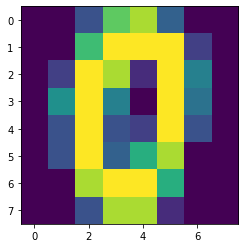

In [114]:
plt.imshow(x_test[0])

In [115]:
y_predi_labels = [np.argmax(i) for i in y_predict]

In [116]:
print(y_predi_labels)

[0, 5, 5, 7, 4, 9, 3, 7, 2, 4, 3, 1, 5, 3, 5, 0, 4, 3, 9, 8, 1, 5, 8, 2, 7, 3, 8, 2, 8, 3, 7, 5, 3, 8, 5, 8, 8, 6, 4, 1, 5, 7, 1, 2, 0, 5, 4, 5, 3, 1, 4, 7, 9, 3, 7, 4, 4, 9, 1, 6, 3, 2, 8, 0, 2, 5, 9, 3, 5, 2, 1, 9, 9, 6, 4, 6, 5, 0, 9, 3, 1, 2, 6, 3, 8, 6, 4, 1, 2, 3, 3, 9, 7, 4, 4, 3, 2, 7, 7, 0, 8, 3, 5, 5, 8, 8, 6, 3, 2, 9, 8, 8, 1, 5, 8, 1, 2, 8, 7, 3, 7, 9, 3, 1, 5, 6, 2, 4, 1, 4, 2, 1, 5, 3, 2, 6, 0, 9, 8, 9, 9, 2, 4, 4, 7, 2, 3, 6, 7, 2, 1, 5, 3, 9, 4, 4, 6, 4, 6, 6, 1, 9, 8, 1, 3, 2, 7, 8, 1, 8, 5, 8, 0, 6, 8, 2, 3, 6, 3, 6, 5, 2, 2, 0, 2, 5, 0, 1, 9, 1, 9, 6, 9, 1, 9, 8, 1, 2, 5, 9, 1, 1, 0, 5, 7, 8, 5, 1, 1, 5, 2, 7, 7, 5, 7, 8, 7, 2, 6, 8, 1, 1, 5, 6, 5, 9, 1, 0, 7, 4, 6, 0, 1, 1, 8, 3, 4, 0, 3, 1, 6, 8, 8, 4, 4, 5, 8, 4, 4, 8, 7, 7, 0, 3, 7, 3, 3, 2, 0, 8, 8, 5, 0, 1, 9, 9, 8, 2, 4, 9, 0, 1, 0, 1, 0, 0, 7, 5, 6, 3, 3, 6, 5, 3, 7, 6, 7, 8, 5, 7, 1, 5, 3, 0, 1, 5, 3, 7, 9, 6, 4, 2, 8, 4, 5, 7, 9, 8, 4, 4, 3, 3, 0, 2, 9, 3, 6, 2, 2, 1, 5, 0, 3, 5, 8, 9, 4, 3, 2, 4, 0, 0, 3, 

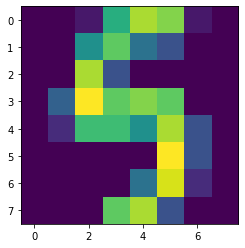

In [118]:
plt.imshow(x_test[1])

In [117]:
y_predi_labels[1]

5

In [119]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predi_labels)

In [120]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[29,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  1, 38,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 35,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  1,  0, 31]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

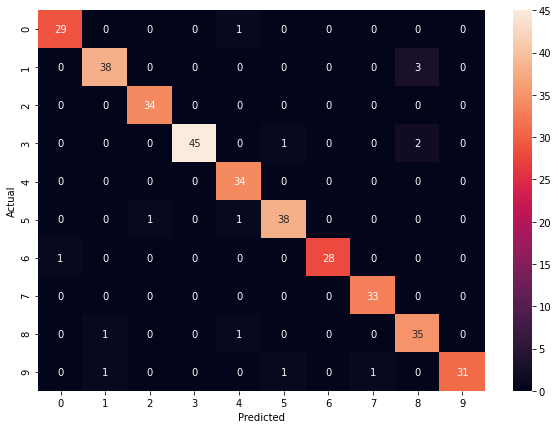

In [122]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")